<a href="https://colab.research.google.com/github/COGS108/group038_sp21/blob/main/EDACheckpoint_group038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 108 - EDA Checkpoint

# Names

- Nick Fithen
- Lupe De Anda
- Andrew Lona
- Kimberly Alonzo
- Andres Villegas

<a id='research_question'></a>
# Research Question

***it might be hard to make an argument for a causal relationship, maybe just asking if theres some kind of correlation between the two? (LD)

(Original) Is there a causal relationship between the amount of nationwide police shootings and the increase of bills proposed in California concerning law enforcement?

(Revision #1) Is there a causal relationship between the amount of reported police shootings in the state of California and the increase of bills proposed in California concerning law enforcement?

Or

(Revision #2) What is the relationship between the amount of reported California police shootings and the number of law enforcement bills proposed in California?

# Setup

In [15]:
#importing basic programs + explanations of each import
import pandas as pd #Needed to create and modify dataframes from the data we collect (and hopefully merge them together)

import seaborn as sns #Not used yet but needed to quickly graph data for visual inspection (such as for outliers)
import matplotlib.pyplot as plt #Not used but will be important for specific visualizations in the near future
import numpy as np #Not used yet but is useful for array manipulations

from bs4 import BeautifulSoup # Beautiful Soup library used for web scraping
import requests # this is needed to communicate with the html file

# Data Cleaning

Describe your data cleaning steps here.

In [16]:
#reading in dataframes for cleaning

df_vocab = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/vocab.csv')
df_codes = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/codes.csv')
df_bills = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/bills.csv')
df_shootings = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/shootings.csv')
df_cleaned_bills = pd.read_csv('https://raw.githubusercontent.com/COGS108/group038_sp21/main/Bills_Dataframe_2009_2021.csv?token=ATRPBRDVYRAZL7R6UAPS6DLAXHEOS')
#df_vocab and df_codes are already in a good clean format - only have 2 columns, words and defns
#df_bills was read in as a placeholder df that only holds 1000 rows of the information we want 
#while a webscraper is built
#df_shootings still needs to be cleaned

In [17]:
#dropping names of victims for privacy reasons
df_shootings = df_shootings.drop(labels='name',axis=1)

#dropping columns we dont need to answer our question 
df_shootings = df_shootings.drop(labels=['latitude','longitude','is_geocoding_exact','signs_of_mental_illness','threat_level','flee','body_camera'],axis=1)

In [18]:
#narrowing down data to only include CA
df_shootings = df_shootings[df_shootings['state']=='CA']

#converting to datetime and creating month and year columns
df_shootings.loc[:,'date'] = pd.to_datetime(df_shootings['date'])
df_shootings['month'] = df_shootings['date'].dt.month
df_shootings['year'] = df_shootings['date'].dt.year
df_shootings.head(3)

,id,date,manner_of_death,armed,age,gender,race,city,state,month,year
3,8,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,1,2015
10,19,2015-01-06,shot and Tasered,knife,25.0,M,W,Stockton,CA,1,2015
22,43,2015-01-11,shot,gun,23.0,M,H,South Gate,CA,1,2015


In [19]:
#dataframes of shootings sorted by year 
shootings_2015 = df_shootings[df_shootings['year']==2015]
shootings_2016 = df_shootings[df_shootings['year']==2016]
shootings_2017 = df_shootings[df_shootings['year']==2017]
shootings_2018 = df_shootings[df_shootings['year']==2018]
shootings_2019 = df_shootings[df_shootings['year']==2019]
shootings_2020 = df_shootings[df_shootings['year']==2020]
shootings_2021 = df_shootings[df_shootings['year']==2021]

In [20]:
#dataframes of shootings per month regardless of year
shootings_jan_all = df_shootings[df_shootings['month']==1]
shootings_feb_all = df_shootings[df_shootings['month']==2]
shootings_mar_all = df_shootings[df_shootings['month']==3]
shootings_apr_all = df_shootings[df_shootings['month']==4]
shootings_may_all = df_shootings[df_shootings['month']==5]
shootings_jun_all = df_shootings[df_shootings['month']==6]
shootings_jul_all = df_shootings[df_shootings['month']==7]
shootings_aug_all = df_shootings[df_shootings['month']==8]
shootings_sep_all = df_shootings[df_shootings['month']==9]
shootings_oct_all = df_shootings[df_shootings['month']==10]
shootings_nov_all = df_shootings[df_shootings['month']==11]
shootings_dec_all = df_shootings[df_shootings['month']==12]

In [21]:
#to access a specific month of a specific year we can use: 
#variable_name = shootings_xxxx[shootings_xxxx['month' == y]] 
#where xxxx is year as an integer and y is the month as an integer

#ex:
jan_2020 = shootings_2020[shootings_2020['month']==1]
jan_2020

,id,date,manner_of_death,armed,age,gender,race,city,state,month,year
4931,5342,2020-01-01,shot and Tasered,toy weapon,25.0,M,W,Grass Valley,CA,1,2020
4935,5350,2020-01-02,shot,gun,41.0,M,W,Murrieta,CA,1,2020
4952,5498,2020-01-08,shot,gun,27.0,M,NaN,Nipton,CA,1,2020
4958,5365,2020-01-10,shot,vehicle,24.0,M,H,Muscoy,CA,1,2020
4963,5367,2020-01-12,shot,toy weapon,31.0,M,H,Los Angeles,CA,1,2020
4980,5389,2020-01-20,shot,gun,31.0,M,H,Fountain Valley,CA,1,2020
4998,5428,2020-01-24,shot,gun,31.0,M,H,Oak Park,CA,1,2020


### Current Progress of Final Dataframe
- Dropping all non-shooting-related bills from the CA legislature based off vocab + code words (done)
  - Possible TF-IDF of content analysis within bills may be a better solution vs. using the titles (IP)
- Dropping all non-CA-related shootings from the shootings dataframe (done)
- Counting each shooting and bill by date and creating a new dataframe for easier reference (IP)

In [22]:
#Showing current modified bills dataframe, the 'BillsPandasCleanup.ipynb' shows the process for creating and cleaning the
#current CA bills dataframe (acquired from http://www.leginfo.ca.gov/)
df_cleaned_bills.head()

,Unnamed: 0,bill_id,session_id,bill_number,status,status_desc,status_date,title,description,committee_id,committee,last_action_date,last_action,url,state_link
0,0,61630,30,ABX32,2,Engrossed,20090112,VLF state parks fee: fuel taxes: emergency ser...,An act to add Section 8587.3 to the Government...,0,NaN,20091026,Died Concurrence pending.,https://legiscan.com/CA/bill/ABX32/2009,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...
1,1,59922,30,AB54,1,Introduced,20081204,State government: California Emergency Managem...,An act relating to the California Emergency Ma...,0,NaN,20100202,From committee: Filed with the Chief Clerk pur...,https://legiscan.com/CA/bill/AB54/2009,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...
2,2,59931,30,AB63,4,Passed,20090806,Service contracts: retailers.,An act to add Section 1794.45 to the Civil Cod...,0,NaN,20090806,"Chaptered by Secretary of State - Chapter 74, ...",https://legiscan.com/CA/bill/AB63/2009,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...
3,3,61766,30,ABX76,1,Introduced,20091029,Water diversion and use: reporting.,"An act to amend Sections 5100, 5101, 5103, and...",0,NaN,20091104,From committee without further action.,https://legiscan.com/CA/bill/ABX76/2009,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...
4,4,59959,30,AB91,4,Passed,20091011,Vehicles: driving under the influence (DUI): i...,"An act to amend Sections 13386 and 23576 of, a...",0,NaN,20091011,"Chaptered by Secretary of State - Chapter 217,...",https://legiscan.com/CA/bill/AB91/2009,http://www.leginfo.ca.gov/cgi-bin/postquery?bi...


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

EDA concepts:
- structure - the format of our data file
- granularity - how fine or coarse each row and column is
- scope - how (in)complete our data are
- temporality - how the data are situated in time
- faithfulness - how well the data captures "reality"

#Structure
> What format are the data in?

All of our data is in tabular formats, specifically CSVs.

> Is each observation in a separate row?

Each word (for `df_codes` and `df_vocab`), incident (for `df_shootings`), and bill (for `df_bills`) are represented in their own independent rows.

> What variables (columns) do we have information about?

The information we have includes:
- `df_shootings`: personal identifiers,	date of incident,	manner of death,	whether the victim was armed (and, if so, what they armed with),	their age,	gender,	and race,	the city and	state it took place in, and the	month and	year (extracted from date to help with indexing)
- `df_codes` and `df_vocab`: words associated with police enforcement, specifically radio codes and 'important vocab each police officer should know', along with their definitions
- `df_bills`: ID # of the bill, ID of the session, number of the bill proposed (series of letters, number), status of the bill (based on a 1-5 scale, where each number represents a stage in the process), current decision made on the bill, date the bill status was decided, bill title, desctiption of the bill, ID of the committee, date that last time there was action with the bill, desctiption of the actions taken, url for the bill, state link.


> What `type` of information is in each column

- all columns except for date of incident, month, and	year within `df_shootings` are strings
- date of incident, month, and	year are datetime objects
- all columns in `df_codes` and `df_vocab` are strings
- measure,	subject,	author,	and status in df_bills are stored as strings
- ***session year is stored as a ============

> ***Do we have all of the variables we need?***

> Are the data spread across multiple tables?

Our data is spread across 4 different dataframes (`df_codes`, `df_vocab`, `df_shootings`, and `df_bills`).

> ***How do we want to join the data?***
We want ot join the data by date; however, whether it will be by day, month, or year is yet to be determined.

#Granularity

> What does each record (row) represent?

- df_shootings: Each row represents an individual instance in which someone died to a police related shooting. Additional variables in the row describe the specifics of the shooting (time, reason for shooting, date, etc.)
-df_codes and df_vocab: Each row represents a common word/ code that is understood and used in the police force. The additional definition provides a description for that word or the situation for the code.
-df_bills: Each row represents an individual bill that was proposed. Additional variables found in the column also describe specifics of the bill (dates, people that introduced it, purpose of the bill, current status, etc.)

> Do all records uniformly represent the same level of granularity? Are some rows individual-level, while others are summaries of the group? How will this be handled?

- In terms of df_shootings and df_codes, there is a same level of granularity. Each column focuses one thing and includes specific about it (whether it is a victim or a bill).
- The df_codes and df_vocab dataset also both consists of one word/ code and the definition followed after it (Does not focus on an individual or a group).

> Were the data summarized or aggregated?
How were they grouped & summarized?
What metrics were used for summarization (means and medians are common)?

- It is hard to have outliers for a recorded shooting or a bill that is proposed so we plan on using mean to describe variables within our data.  

> What aggregations/summarizations do we plan to do with these data?

- One form of aggregation is taking the most important elements from each of the datasets that we have to make a larger more uniform dataset for efficient access and interpretation. 
-Additionally, aggregation can be a count dataset with bills and shootings.

#Scope

This is where any descriptive stats and exploratory data viz's would go

From lecture:
- Descriptive Statistics - help to summarize typical values and ranges for variables of interest
- Exploratory Visualizations - help us understand the distributions of individual variables and relationships between variables in our dataset

>how frequently, for what variables, and why are data missing?

<AxesSubplot:xlabel='date', ylabel='age'>

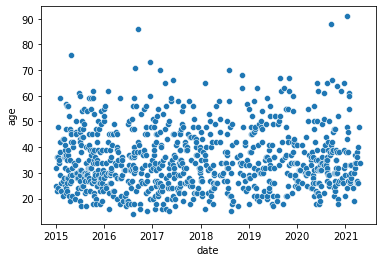

In [23]:
#First visualization is a scatter plot of ages of people that were killed each year.
sns.scatterplot(data=df_shootings, x='date', y='age') 

<AxesSubplot:xlabel='age', ylabel='Count'>

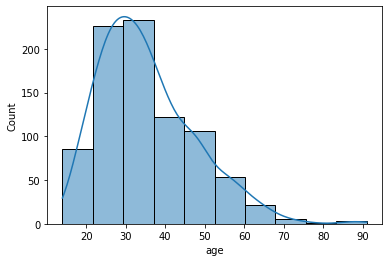

In [24]:
#second visualization 
sns.histplot(df_shootings['age'], bins=10, kde=True)

[Text(0.5, 1.0, 'Number of CA Shootings per Year')]

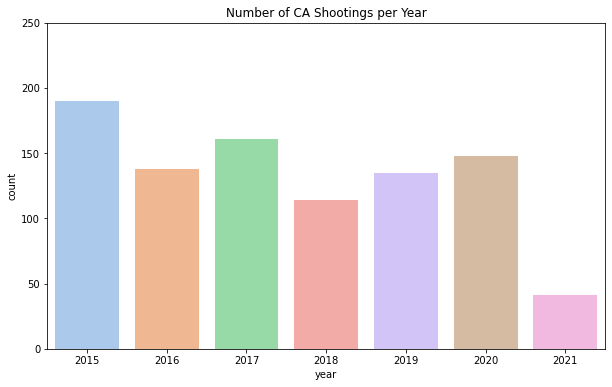

In [25]:
#visualization for shootings in California for every year (something happend with my original graph so aI am redoing ti)-Nick
#making the plot much bigger to see
plt.figure(figsize= (10,6))
cpshooty= sns.countplot(x= df_shootings['year'], data= df_shootings, palette= 'pastel' ).set(title= 'Number of CA Shootings per Year')
#increasing the y-axis
plt.ylim(0, 250)
cpshooty

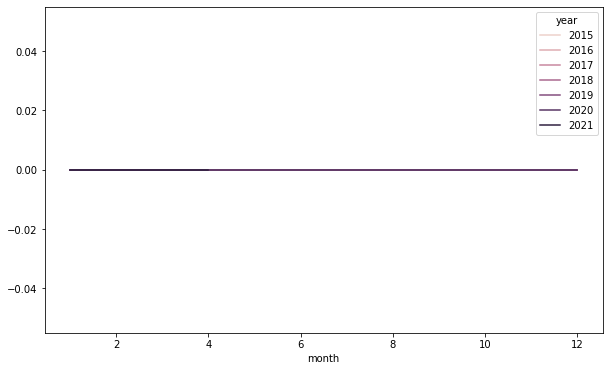

In [26]:
#first, checking to see what data type df_shootings['month'] is
monthdt= df_shootings['month'].unique()
monthdt

#adjusting the df shooting dataset for the months so I can change the number values to strings of the months
def num2month(num):
  #converting string to an actualstring
  string= str(num)

  #taking all of the numbered strings and replacing them with the names of the months.
  if '1' in string:
    output= 'January'
  elif '2' in string:
    output= 'February'
  elif '3' in string:
    output= 'March'
  elif '4' in string:
    output= 'April'
  elif '5' in string:
    output= 'May'
  elif '6' in string:
    output= 'June'
  elif '7' in string:
    output= 'July'
  elif '8' in string:
    output= 'August'
  elif '9' in string:
    output= 'September'
  elif '10' in string:
    output= 'October'
  elif '11' in string:
    output= 'November'
  elif '12' in string:
    output= 'December'

  return output 

  #ok so it seems that I changed all the values from numbers to strings. Lets see if I can generate a line plot now
plt.figure(figsize= (10,6))
sns.lineplot(x= df_shootings['month'], y= sum(df_shootings['month']== 'January'), data= df_shootings, hue= df_shootings['year'] )

#Line plot is still a WIP--> Additional Code written by Andres
#Copying df_shootings and replacing datetime with integer date (Year,Month,Day)
df_shootings_test = df_shootings.copy()

df_shootings_test.dropna(subset=['date'], inplace = True)
df_shootings_test = df_shootings_test.reset_index(drop=True) #Resetting index as loop uses it

index=0 #Index counter

for row in df_shootings_test['date']:
    row = str(row).replace('-','',)
    row = row[0:8:1]
    df_shootings_test.at[index,'date'] = row
#Rewrites the row under the 'Status' column so that the new string is there
    index += 1

#Temporality

> What do reported times represent?
What does each date and time in the dataset mean? Time event occurred? Time reported?
(Note that timezones & Daylight Saving Time are always important to consider)

- For the bills dataset, there is a date that corresponds to the status description of each bill. There is also a date for the last action made for each bill.
- For the shootings dataset, the day month and year represent the date of incident for each police shooting reported.


>How are the dates/times represented? What format are they in?
YYYY-MM-DD? Year? Time? Date & Time?

- For the bills dataset, the status desciption is dated using a YYYY-MM-DD format. The last action made on a bill is dated using a YYYY-MM-DD format. They have been converted from datetime to an integer format (8 digits per date).
-For the shootings dataset, the date is in a YYYY-MM-DD format along with additional columns for individual months labeled 1-12, individual year labeled YYYY, and individual day labeled 1-31. The regular dates have been converted from datetime to an integer format (8 digits per date).

>How are null timestamps represented?
was a "random" date picked?


- Null timestamps are represented with "NaN" 

>What aggregations/summarizations do we plan to do with these data?

- We plan to pull all of the bills that can be categorized as law enforcement.
-We plan to plot the amount of shootings per year against the amount of bills proposed in California to see if there is any relationship.

#Faithfulness

>Are the values reasonable / what we expect?
Unreasonable values examples: dates in the future, locations that don't exist, negative counts, wild outliers

- The values for bills are resonable as we have removed any older dated bills that we do not have shooting data for. Later dates that do not match with shootings will remain as the shootings dataset is 

>Are there inconsistencies across tables?
Identifiers that don't match?
Date of Births that differ between two tables?
Any inconsistencies between values stored in more than one table?

- Each row of each table is an individual case, so there is no possibility for an instance of inconsistencies between tables, since no data is ever repeated.

>Are there data entered by hand? These often contain inconsistencies.

- `df_codes` and `df_vocab` were transfered over from a webpage to an excel spreadsheet, then converted to CSVs by hand. Inconsistencies were dealt with by copying and pasting longer definitions and cross checking once the transfer had finished.

>Any obvious signs of falsification?
examples: repeated names, fake looking email addresses, repeated uncommon names or fields

- There are no obvious signs of falsification.